In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import seaborn as sns
import cv2
import random
from os import listdir
from sklearn.metrics import classification_report
import tensorflow as tf
import keras.utils as image

In [2]:
breast_img = glob.glob('IDC_regular_ps50_idx5/**/*.png', recursive = True)
for imgname in breast_img[:3]:
    print(imgname)

IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1001_class0.png
IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1051_class0.png
IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1101_class0.png


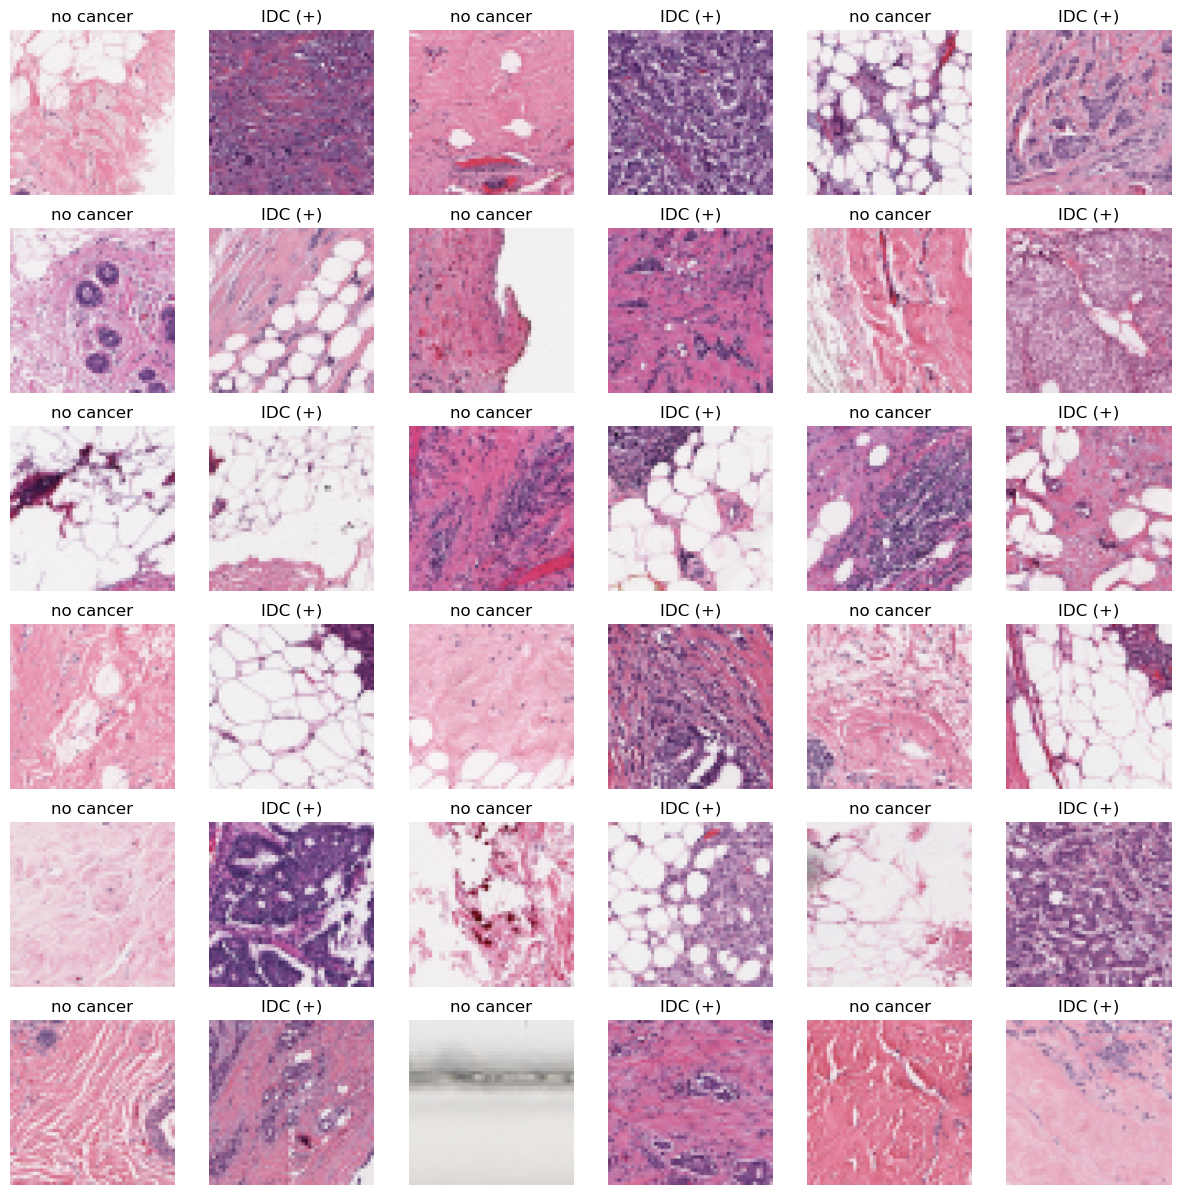

In [3]:
N_IDC = []
P_IDC = []

for img in breast_img:
    if img[-5] == '0' :
        N_IDC.append(img)
    
    elif img[-5] == '1' :
        P_IDC.append(img)
plt.figure(figsize = (15, 15))

some_non = np.random.randint(0, len(N_IDC), 18)
some_can = np.random.randint(0, len(P_IDC), 18)

s = 0
for num in some_non:
    
        img = image.load_img((N_IDC[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        
        plt.subplot(6, 6, 2*s+1)
        plt.axis('off')
        plt.title('no cancer')
        plt.imshow(img.astype('uint8'))
        s += 1
s = 1
for num in some_can:
    
        img = image.load_img((P_IDC[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        
        plt.subplot(6, 6, 2*s)
        plt.axis('off')        
        plt.title('IDC (+)')
        plt.imshow(img.astype('uint8'))
        s += 1

In [4]:
NewN_IDC=N_IDC[:78786]
print(len(NewN_IDC))
print(len(P_IDC))
print(len(N_IDC))

78786
78786
198738


# Image Resizing

In [5]:
non_img_arr = []
can_img_arr = []

for img in N_IDC[:2000]:
        
    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    n_img_size = cv2.resize(n_img, (224, 224), interpolation = cv2.INTER_LINEAR)
    non_img_arr.append([n_img_size, 0])
    
for img in P_IDC[:2000]:
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    c_img_size = cv2.resize(c_img, (224, 224), interpolation = cv2.INTER_LINEAR)
    can_img_arr.append([c_img_size, 1])

In [6]:
print(len(non_img_arr))
print(len(can_img_arr))
print(len(non_img_arr)+len(can_img_arr))

2000
2000
4000


# converting to RBG

In [7]:
non_rgb_arr = []
can_rgb_arr = []

for img, label in non_img_arr:
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    non_rgb_arr.append([rgb_img, label])

for img, label in can_img_arr:
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    can_rgb_arr.append([rgb_img, label])

# Applying Sharpening

In [8]:
kernel = np.array([[-1, -1, -1],
                   [-1, 9, -1],
                   [-1, -1, -1]])

for i, (img, label) in enumerate(non_rgb_arr):
    sharpened_img = cv2.filter2D(img, -1, kernel)
    non_rgb_arr[i][0] = sharpened_img

for i, (img, label) in enumerate(can_rgb_arr):
    sharpened_img = cv2.filter2D(img, -1, kernel)
    can_rgb_arr[i][0] = sharpened_img

# Image Scaling

In [9]:
non_scaled_arr = []
can_scaled_arr = []

for img, label in non_rgb_arr:
    scaled_img = img / 255.0
    non_scaled_arr.append([scaled_img, label])

for img, label in can_rgb_arr:
    scaled_img = img / 255.0
    can_scaled_arr.append([scaled_img, label])
print(can_scaled_arr[0])

[array([[[0.98823529, 0.99215686, 0.99215686],
        [0.98823529, 0.99215686, 0.99215686],
        [0.98823529, 0.99215686, 0.99215686],
        ...,
        [0.98431373, 0.98431373, 0.98823529],
        [0.98431373, 0.98431373, 0.98823529],
        [0.98431373, 0.98431373, 0.98823529]],

       [[0.98823529, 0.99215686, 0.99215686],
        [0.98823529, 0.99215686, 0.99215686],
        [0.98823529, 0.99215686, 0.99215686],
        ...,
        [0.98431373, 0.98431373, 0.98823529],
        [0.98431373, 0.98431373, 0.98823529],
        [0.98431373, 0.98431373, 0.98823529]],

       [[0.98823529, 0.99215686, 0.99215686],
        [0.98823529, 0.99215686, 0.99215686],
        [0.98823529, 0.99215686, 0.99215686],
        ...,
        [0.98431373, 0.98431373, 0.98823529],
        [0.98431373, 0.98431373, 0.98823529],
        [0.98431373, 0.98431373, 0.98823529]],

       ...,

       [[0.98823529, 0.98823529, 0.98823529],
        [0.98823529, 0.98823529, 0.98823529],
        [0.98823529, 

# Encoding of labels

In [10]:
non_labels = [label for _, label in non_scaled_arr]

can_labels = [label for _, label in can_scaled_arr]

# Displaying of Images after Pre-processing

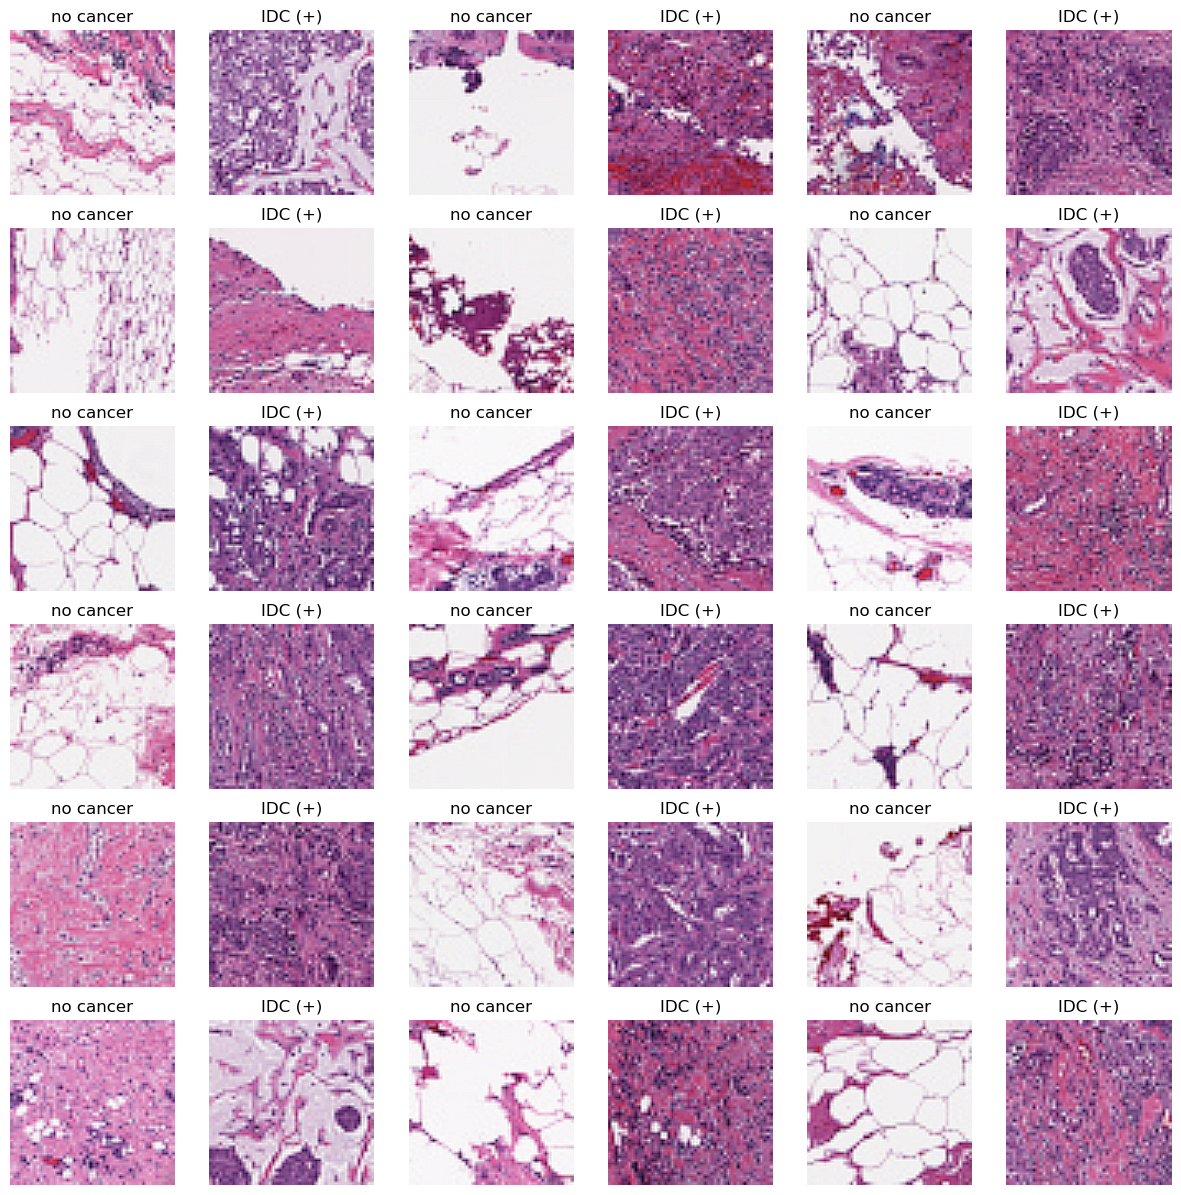

In [11]:

# Assuming non_scaled_arr and can_scaled_arr are lists containing numpy arrays
plt.figure(figsize=(15, 15))

some_non = np.random.randint(0, len(non_scaled_arr), 18)
some_can = np.random.randint(0, len(can_scaled_arr), 18)

s = 0
for num in some_non:
    img_array = non_scaled_arr[num][0]  # Get the image array from non_scaled_arr

    plt.subplot(6, 6, 2 * s + 1)
    plt.axis('off')
    plt.title('no cancer')
    plt.imshow(img_array)
    s += 1

s = 1
for num in some_can:
    img_array = can_scaled_arr[num][0]  # Get the image array from can_scaled_arr

    plt.subplot(6, 6, 2 * s)
    plt.axis('off')
    plt.title('IDC (+)')
    plt.imshow(img_array)
    s += 1

plt.show()


# Converting Numpy array to io.BytesIO

In [12]:
import numpy as np
from PIL import Image
from io import BytesIO

def numpy_array_to_bytesio(numpy_array):
    numpy_array = numpy_array.astype(np.uint8)
    pil_image = Image.fromarray(numpy_array)
    bytes_io = BytesIO()
    pil_image.save(bytes_io, format='PNG')
    bytes_io.seek(0)
    return bytes_io

def image_paths_to_bytesio(image_paths):
    bytesio_images = []
    for img_array, _ in image_paths:
        bytesio_image = numpy_array_to_bytesio(img_array)
        bytesio_images.append(bytesio_image)
    return bytesio_images

non_scaled_bytesio = image_paths_to_bytesio(non_scaled_arr)
can_scaled_bytesio = image_paths_to_bytesio(can_scaled_arr)

# RESNET50V2

In [13]:
import numpy as np
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from io import BytesIO

resnet_model = ResNet50V2(input_shape=(224, 224, 3), weights='imagenet', include_top=False, pooling='avg')

def extract_features_from_bytesio(image_bytesio):
    img = Image.open(image_bytesio)
    img = img.resize((224, 224))
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = resnet_model.predict(img_array)
    return features

non_features = [extract_features_from_bytesio(img_bytesio) for img_bytesio in non_scaled_bytesio]
can_features = [extract_features_from_bytesio(img_bytesio) for img_bytesio in can_scaled_bytesio]



1/1 [==============================] - 0s 140ms/step


# Splitting the data

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

X = np.concatenate((non_features, can_features), axis=0)
y = np.concatenate((non_labels, can_labels), axis=0)

data_array = np.array(X)

X_2d = data_array.reshape(data_array.shape[0], -1)

X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.2, random_state=42)

# Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

kfold_rf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_rf = cross_val_score(rf_classifier, X_train, y_train, cv=kfold_rf)

rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("Random Forest Classifier Metrics:")
print("Accuracy (RF):", accuracy_rf)
print("Precision (RF):", precision_rf)
print("Recall (RF):", recall_rf)
print("F1 Score (RF):", f1_rf)
print("Mean Absolute Error (MAE_RF):", mae_rf)
print("Mean Squared Error (MSE_RF):", mse_rf)
print("Root Mean Squared Error (RMSE_RF):", rmse_rf)


Random Forest Classifier Metrics:
Accuracy (RF): 0.80625
Precision (RF): 0.8409785932721713
Recall (RF): 0.7275132275132276
F1 Score (RF): 0.7801418439716312
Mean Absolute Error (MAE_RF): 0.19375
Mean Squared Error (MSE_RF): 0.19375
Root Mean Squared Error (RMSE_RF): 0.44017042154147523


# Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)

kfold_dt = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_dt = cross_val_score(dt_classifier, X_train, y_train, cv=kfold_dt)

dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

print("Decision Trees Classifier Metrics:")
print("Accuracy (DT):", accuracy_dt)
print("Precision (DT):", precision_dt)
print("Recall (DT):", recall_dt)
print("F1 Score (DT):", f1_dt)
print("Mean Absolute Error (MAE_DT):", mae_dt)
print("Mean Squared Error (MSE_DT):", mse_dt)
print("Root Mean Squared Error (RMSE_DT):", rmse_dt)


Decision Trees Classifier Metrics:
Accuracy (DT): 0.70875
Precision (DT): 0.6781326781326781
Recall (DT): 0.7301587301587301
F1 Score (DT): 0.7031847133757961
Mean Absolute Error (MAE_DT): 0.29125
Mean Squared Error (MSE_DT): 0.29125
Root Mean Squared Error (RMSE_DT): 0.5396758286230726


# Extra Tree

In [17]:
from sklearn.ensemble import ExtraTreesClassifier

et_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)

kfold_et = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_et = cross_val_score(et_classifier, X_train, y_train, cv=kfold_et)

et_classifier.fit(X_train, y_train)

y_pred_et = et_classifier.predict(X_test)

accuracy_et = accuracy_score(y_test, y_pred_et)
precision_et = precision_score(y_test, y_pred_et)
recall_et = recall_score(y_test, y_pred_et)
f1_et = f1_score(y_test, y_pred_et)
mae_et = mean_absolute_error(y_test, y_pred_et)
mse_et = mean_squared_error(y_test, y_pred_et)
rmse_et = np.sqrt(mse_et)

print("\nExtra Trees Classifier Metrics:")
print("Accuracy (ET):", accuracy_et)
print("Precision (ET):", precision_et)
print("Recall (ET):", recall_et)
print("F1 Score (ET):", f1_et)
print("Mean Absolute Error (MAE_ET):", mae_et)
print("Mean Squared Error (MSE_ET):", mse_et)
print("Root Mean Squared Error (RMSE_ET):", rmse_et)


Extra Trees Classifier Metrics:
Accuracy (ET): 0.795
Precision (ET): 0.8165680473372781
Recall (ET): 0.7301587301587301
F1 Score (ET): 0.770949720670391
Mean Absolute Error (MAE_ET): 0.205
Mean Squared Error (MSE_ET): 0.205
Root Mean Squared Error (RMSE_ET): 0.4527692569068708


# AdaBoost 

In [18]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)

kfold_ab = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_ab = cross_val_score(adaboost_classifier, X_train, y_train, cv=kfold_ab)

adaboost_classifier.fit(X_train, y_train)

y_pred_ab = adaboost_classifier.predict(X_test)

accuracy_ab = accuracy_score(y_test, y_pred_ab)
precision_ab = precision_score(y_test, y_pred_ab)
recall_ab = recall_score(y_test, y_pred_ab)
f1_ab = f1_score(y_test, y_pred_ab)
mae_ab = mean_absolute_error(y_test, y_pred_ab)
mse_ab = mean_squared_error(y_test, y_pred_ab)
rmse_ab = np.sqrt(mse_ab)

print("\nAdaBoost Classifier Metrics:")
print("Accuracy (AB):", accuracy_ab)
print("Precision (AB):", precision_ab)
print("Recall (AB):", recall_ab)
print("F1 Score (AB):", f1_ab)
print("Mean Absolute Error (MAE_AB):", mae_ab)
print("Mean Squared Error (MSE_AB):", mse_ab)
print("Root Mean Squared Error (RMSE_AB):", rmse_ab)


AdaBoost Classifier Metrics:
Accuracy (AB): 0.78625
Precision (AB): 0.7647058823529411
Recall (AB): 0.791005291005291
F1 Score (AB): 0.7776332899869961
Mean Absolute Error (MAE_AB): 0.21375
Mean Squared Error (MSE_AB): 0.21375
Root Mean Squared Error (RMSE_AB): 0.46233105022267323


# Histogram Gradient Boosting Classifier

In [19]:
from sklearn.ensemble import HistGradientBoostingClassifier, HistGradientBoostingRegressor

hist_gb_classifier = HistGradientBoostingClassifier(random_state=42)

kfold_hg = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_hg = cross_val_score(hist_gb_classifier, X_train, y_train, cv=kfold_hg)

hist_gb_classifier.fit(X_train, y_train)

y_pred_hgb = hist_gb_classifier.predict(X_test)

accuracy_hgb = accuracy_score(y_test, y_pred_hgb)
precision_hgb = precision_score(y_test, y_pred_hgb)
recall_hgb = recall_score(y_test, y_pred_hgb)
f1_hgb = f1_score(y_test, y_pred_hgb)
mae_hgb = mean_absolute_error(y_test, y_pred_hgb)
mse_hgb = mean_squared_error(y_test, y_pred_hgb)
rmse_hgb = np.sqrt(mse_hgb)

print("\nHistogram Gradient Boosting Classifier Metrics:")
print("Accuracy (HGB):", accuracy_hgb)
print("Precision (HGB):", precision_hgb)
print("Recall (HGB):", recall_hgb)
print("F1 Score (HGB):", f1_hgb)
print("Mean Absolute Error (MAE_HGB):", mae_hgb)
print("Mean Squared Error (MSE_HGB):", mse_hgb)
print("Root Mean Squared Error (RMSE_HGB):", rmse_hgb)



Histogram Gradient Boosting Classifier Metrics:
Accuracy (HGB): 0.82625
Precision (HGB): 0.8203753351206434
Recall (HGB): 0.8095238095238095
F1 Score (HGB): 0.81491344873502
Mean Absolute Error (MAE_HGB): 0.17375
Mean Squared Error (MSE_HGB): 0.17375
Root Mean Squared Error (RMSE_HGB): 0.41683330001332664


# Gradient Boosting Classifier

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

kfold_gb = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_gb = cross_val_score(gb_classifier, X_train, y_train, cv=kfold_gb)

gb_classifier.fit(X_train, y_train)

y_pred_gb = gb_classifier.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)

print("\nGradient Boosting Classifier Metrics:")
print("Accuracy (GB):", accuracy_gb)
print("Precision (GB):", precision_gb)
print("Recall (GB):", recall_gb)
print("F1 Score (GB):", f1_gb)
print("Mean Absolute Error (MAE_GB):", mae_gb)
print("Mean Squared Error (MSE_GB):", mse_gb)
print("Root Mean Squared Error (RMSE_GB):", rmse_gb)


Gradient Boosting Classifier Metrics:
Accuracy (GB): 0.82375
Precision (GB): 0.8228882833787466
Recall (GB): 0.798941798941799
F1 Score (GB): 0.810738255033557
Mean Absolute Error (MAE_GB): 0.17625
Mean Squared Error (MSE_GB): 0.17625
Root Mean Squared Error (RMSE_GB): 0.41982139059366663


# XGBoost

In [21]:
import xgboost as xgb
from sklearn.model_selection import KFold
n_splits = 5

kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 0
}

highest_proba = 0
best_model = None

for train_index, val_index in kfold.split(X_train):
    
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    dtrain_fold = xgb.DMatrix(X_train_fold, label=y_train_fold)
    dval_fold = xgb.DMatrix(X_val_fold, label=y_val_fold)
    
    xgb_model = xgb.train(params, dtrain_fold, num_boost_round=1000, evals=[(dval_fold, 'validation')], early_stopping_rounds=10, verbose_eval=False)

    y_pred_val_proba = xgb_model.predict(dval_fold)
    
    max_proba_fold = max(y_pred_val_proba)
    
    if max_proba_fold > highest_proba:
        highest_proba = max_proba_fold
        best_model = xgb_model

dtest = xgb.DMatrix(X_test)
y_pred_proba_xgb = best_model.predict(dtest)

threshold = 0.5
y_pred_xgb = (y_pred_proba_xgb >= threshold).astype(int)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

print("\nXGBoost Classifier Metrics:")
print("Accuracy (XGB):", accuracy_xgb)
print("Precision (XGB):", precision_xgb)
print("Recall (XGB):", recall_xgb)
print("F1 Score (XGB):", f1_xgb)
print("Mean Absolute Error (MAE_XGB):", mae_xgb)
print("Mean Squared Error (MSE_XGB):", mse_xgb)
print("Root Mean Squared Error (RMSE_XGB):", rmse_xgb)



XGBoost Classifier Metrics:
Accuracy (XGB): 0.81875
Precision (XGB): 0.8157181571815718
Recall (XGB): 0.7962962962962963
F1 Score (XGB): 0.8058902275769746
Mean Absolute Error (MAE_XGB): 0.18125
Mean Squared Error (MSE_XGB): 0.18125
Root Mean Squared Error (RMSE_XGB): 0.42573465914816


# Plotting of performance and error scores

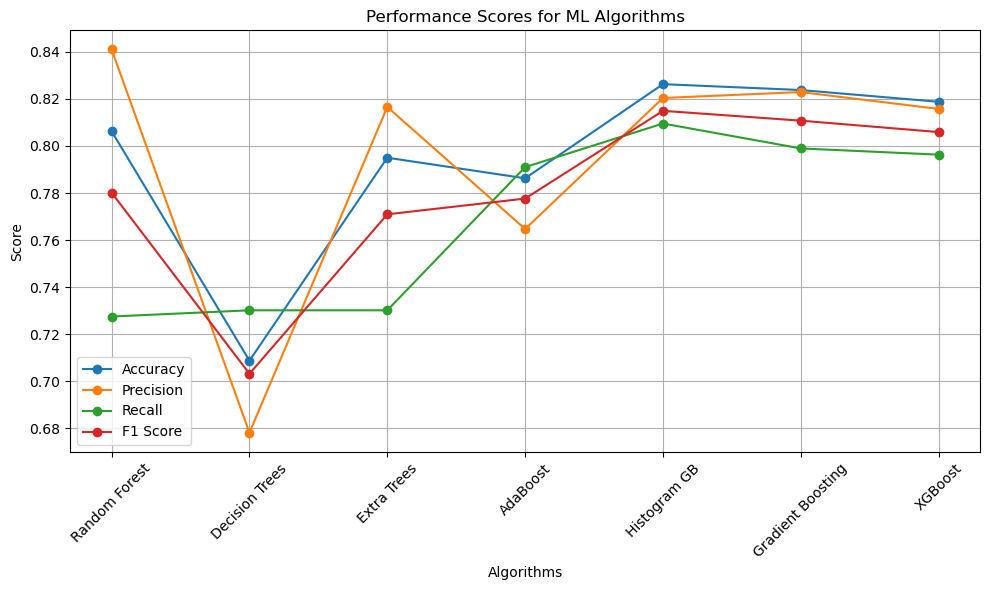

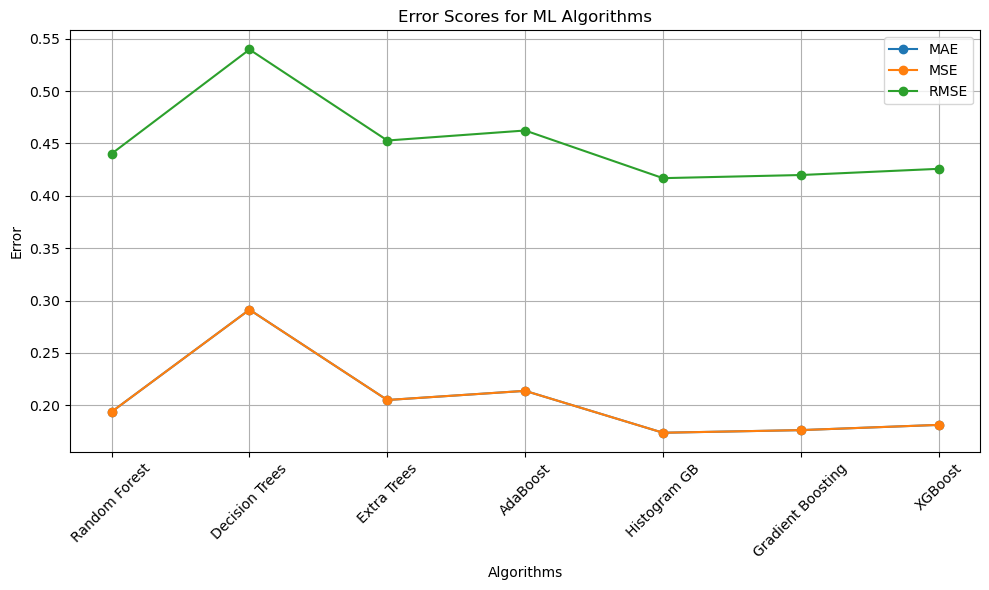

In [22]:
accuracy_scores = [accuracy_rf, accuracy_dt, accuracy_et, accuracy_ab, accuracy_hgb, accuracy_gb, accuracy_xgb]
precision_scores = [precision_rf, precision_dt, precision_et, precision_ab, precision_hgb, precision_gb, precision_xgb]
recall_scores = [recall_rf, recall_dt, recall_et, recall_ab, recall_hgb, recall_gb, recall_xgb]
f1_scores = [f1_rf, f1_dt, f1_et, f1_ab, f1_hgb, f1_gb, f1_xgb]

mae_scores = [mae_rf, mae_dt, mae_et, mae_ab, mae_hgb, mae_gb, mae_xgb]
mse_scores = [mse_rf, mse_dt, mse_et, mse_ab, mse_hgb, mse_gb, mse_xgb]
rmse_scores = [rmse_rf, rmse_dt, rmse_et, rmse_ab, rmse_hgb, rmse_gb, rmse_xgb]

algorithms = ['Random Forest', 'Decision Trees', 'Extra Trees', 'AdaBoost', 'Histogram GB', 'Gradient Boosting', 'XGBoost']

plt.figure(figsize=(10, 6))
plt.plot(algorithms, accuracy_scores, marker='o', label='Accuracy')
plt.plot(algorithms, precision_scores, marker='o', label='Precision')
plt.plot(algorithms, recall_scores, marker='o', label='Recall')
plt.plot(algorithms, f1_scores, marker='o', label='F1 Score')
plt.title('Performance Scores for ML Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(algorithms, mae_scores, marker='o', label='MAE')
plt.plot(algorithms, mse_scores, marker='o', label='MSE')
plt.plot(algorithms, rmse_scores, marker='o', label='RMSE')
plt.title('Error Scores for ML Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Error')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Performance Scores

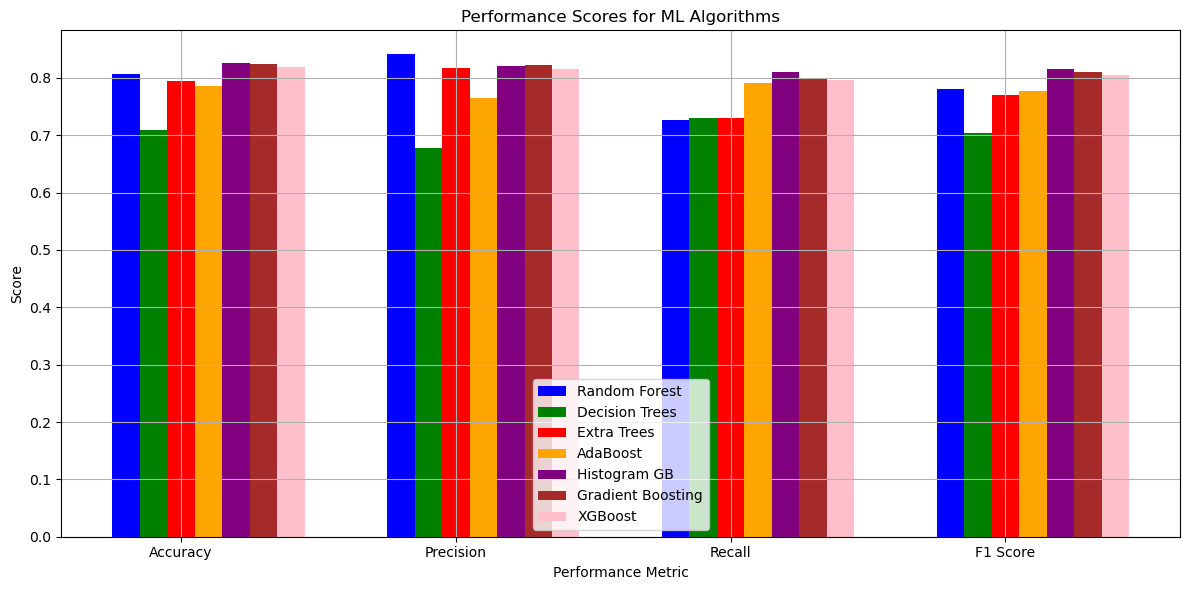

In [23]:
accuracy_scores = [accuracy_rf, accuracy_dt, accuracy_et, accuracy_ab, accuracy_hgb, accuracy_gb, accuracy_xgb]
precision_scores = [precision_rf, precision_dt, precision_et, precision_ab, precision_hgb, precision_gb, precision_xgb]
recall_scores = [recall_rf, recall_dt, recall_et, recall_ab, recall_hgb, recall_gb, recall_xgb]
f1_scores = [f1_rf, f1_dt, f1_et, f1_ab, f1_hgb, f1_gb, f1_xgb]

algorithms = ['Random Forest', 'Decision Trees', 'Extra Trees', 'AdaBoost', 'Histogram GB', 'Gradient Boosting', 'XGBoost']

bar_width = 0.1

index = np.arange(4)

plt.figure(figsize=(12, 6))

plt.bar(index - 2*bar_width, [accuracy_scores[0], precision_scores[0], recall_scores[0], f1_scores[0]], color='b', width=bar_width, label='Random Forest')
plt.bar(index - bar_width, [accuracy_scores[1], precision_scores[1], recall_scores[1], f1_scores[1]], color='g', width=bar_width, label='Decision Trees')
plt.bar(index, [accuracy_scores[2], precision_scores[2], recall_scores[2], f1_scores[2]], color='r', width=bar_width, label='Extra Trees')
plt.bar(index + bar_width, [accuracy_scores[3], precision_scores[3], recall_scores[3], f1_scores[3]], color='orange', width=bar_width, label='AdaBoost')
plt.bar(index + 2*bar_width, [accuracy_scores[4], precision_scores[4], recall_scores[4], f1_scores[4]], color='purple', width=bar_width, label='Histogram GB')
plt.bar(index + 3*bar_width, [accuracy_scores[5], precision_scores[5], recall_scores[5], f1_scores[5]], color='brown', width=bar_width, label='Gradient Boosting')
plt.bar(index + 4*bar_width, [accuracy_scores[6], precision_scores[6], recall_scores[6], f1_scores[6]], color='pink', width=bar_width, label='XGBoost')

plt.title('Performance Scores for ML Algorithms')
plt.xlabel('Performance Metric')
plt.ylabel('Score')
plt.xticks(index, ['Accuracy', 'Precision', 'Recall', 'F1 Score'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Error scores

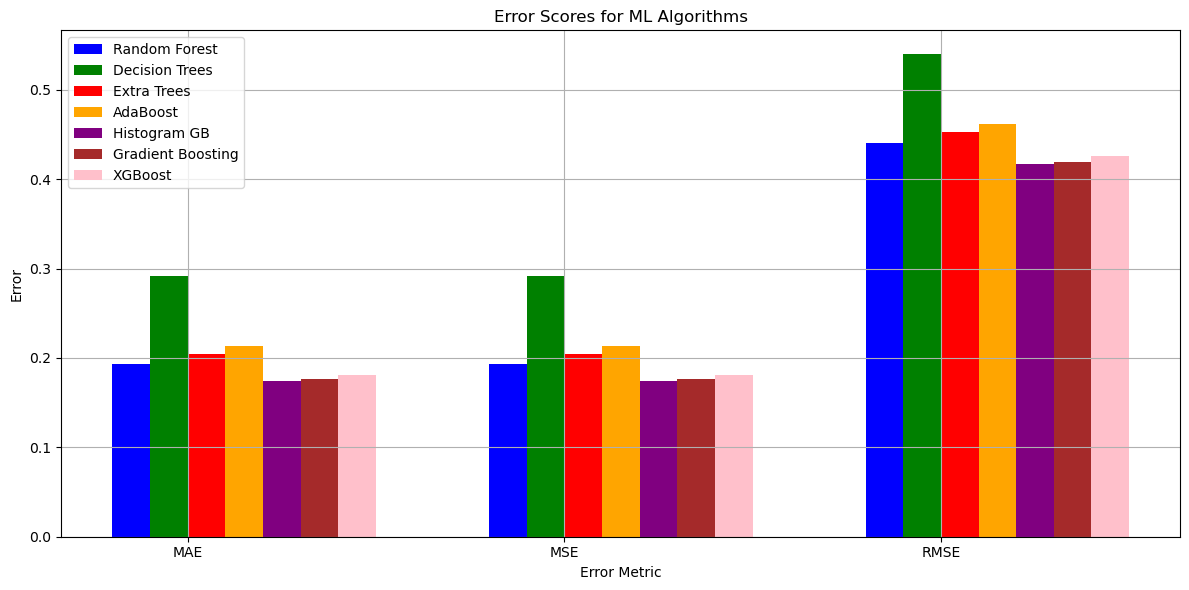

In [24]:
mae_scores = [mae_rf, mae_dt, mae_et, mae_ab, mae_hgb, mae_gb, mae_xgb]
mse_scores = [mse_rf, mse_dt, mse_et, mse_ab, mse_hgb, mse_gb, mse_xgb]
rmse_scores = [rmse_rf, rmse_dt, rmse_et, rmse_ab, rmse_hgb, rmse_gb, rmse_xgb]

algorithms = ['Random Forest', 'Decision Trees', 'Extra Trees', 'AdaBoost', 'Histogram GB', 'Gradient Boosting', 'XGBoost']

bar_width = 0.1

index = np.arange(3)

plt.figure(figsize=(12, 6))

plt.bar(index - 1.5*bar_width, [mae_scores[0], mse_scores[0], rmse_scores[0]], color='b', width=bar_width, label='Random Forest')
plt.bar(index - 0.5*bar_width, [mae_scores[1], mse_scores[1], rmse_scores[1]], color='g', width=bar_width, label='Decision Trees')
plt.bar(index + 0.5*bar_width, [mae_scores[2], mse_scores[2], rmse_scores[2]], color='r', width=bar_width, label='Extra Trees')
plt.bar(index + 1.5*bar_width, [mae_scores[3], mse_scores[3], rmse_scores[3]], color='orange', width=bar_width, label='AdaBoost')
plt.bar(index + 2.5*bar_width, [mae_scores[4], mse_scores[4], rmse_scores[4]], color='purple', width=bar_width, label='Histogram GB')
plt.bar(index + 3.5*bar_width, [mae_scores[5], mse_scores[5], rmse_scores[5]], color='brown', width=bar_width, label='Gradient Boosting')
plt.bar(index + 4.5*bar_width, [mae_scores[6], mse_scores[6], rmse_scores[6]], color='pink', width=bar_width, label='XGBoost')

plt.title('Error Scores for ML Algorithms')
plt.xlabel('Error Metric')
plt.ylabel('Error')
plt.xticks(index, ['MAE', 'MSE', 'RMSE'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Plotting confusion matrices for all the algorithms

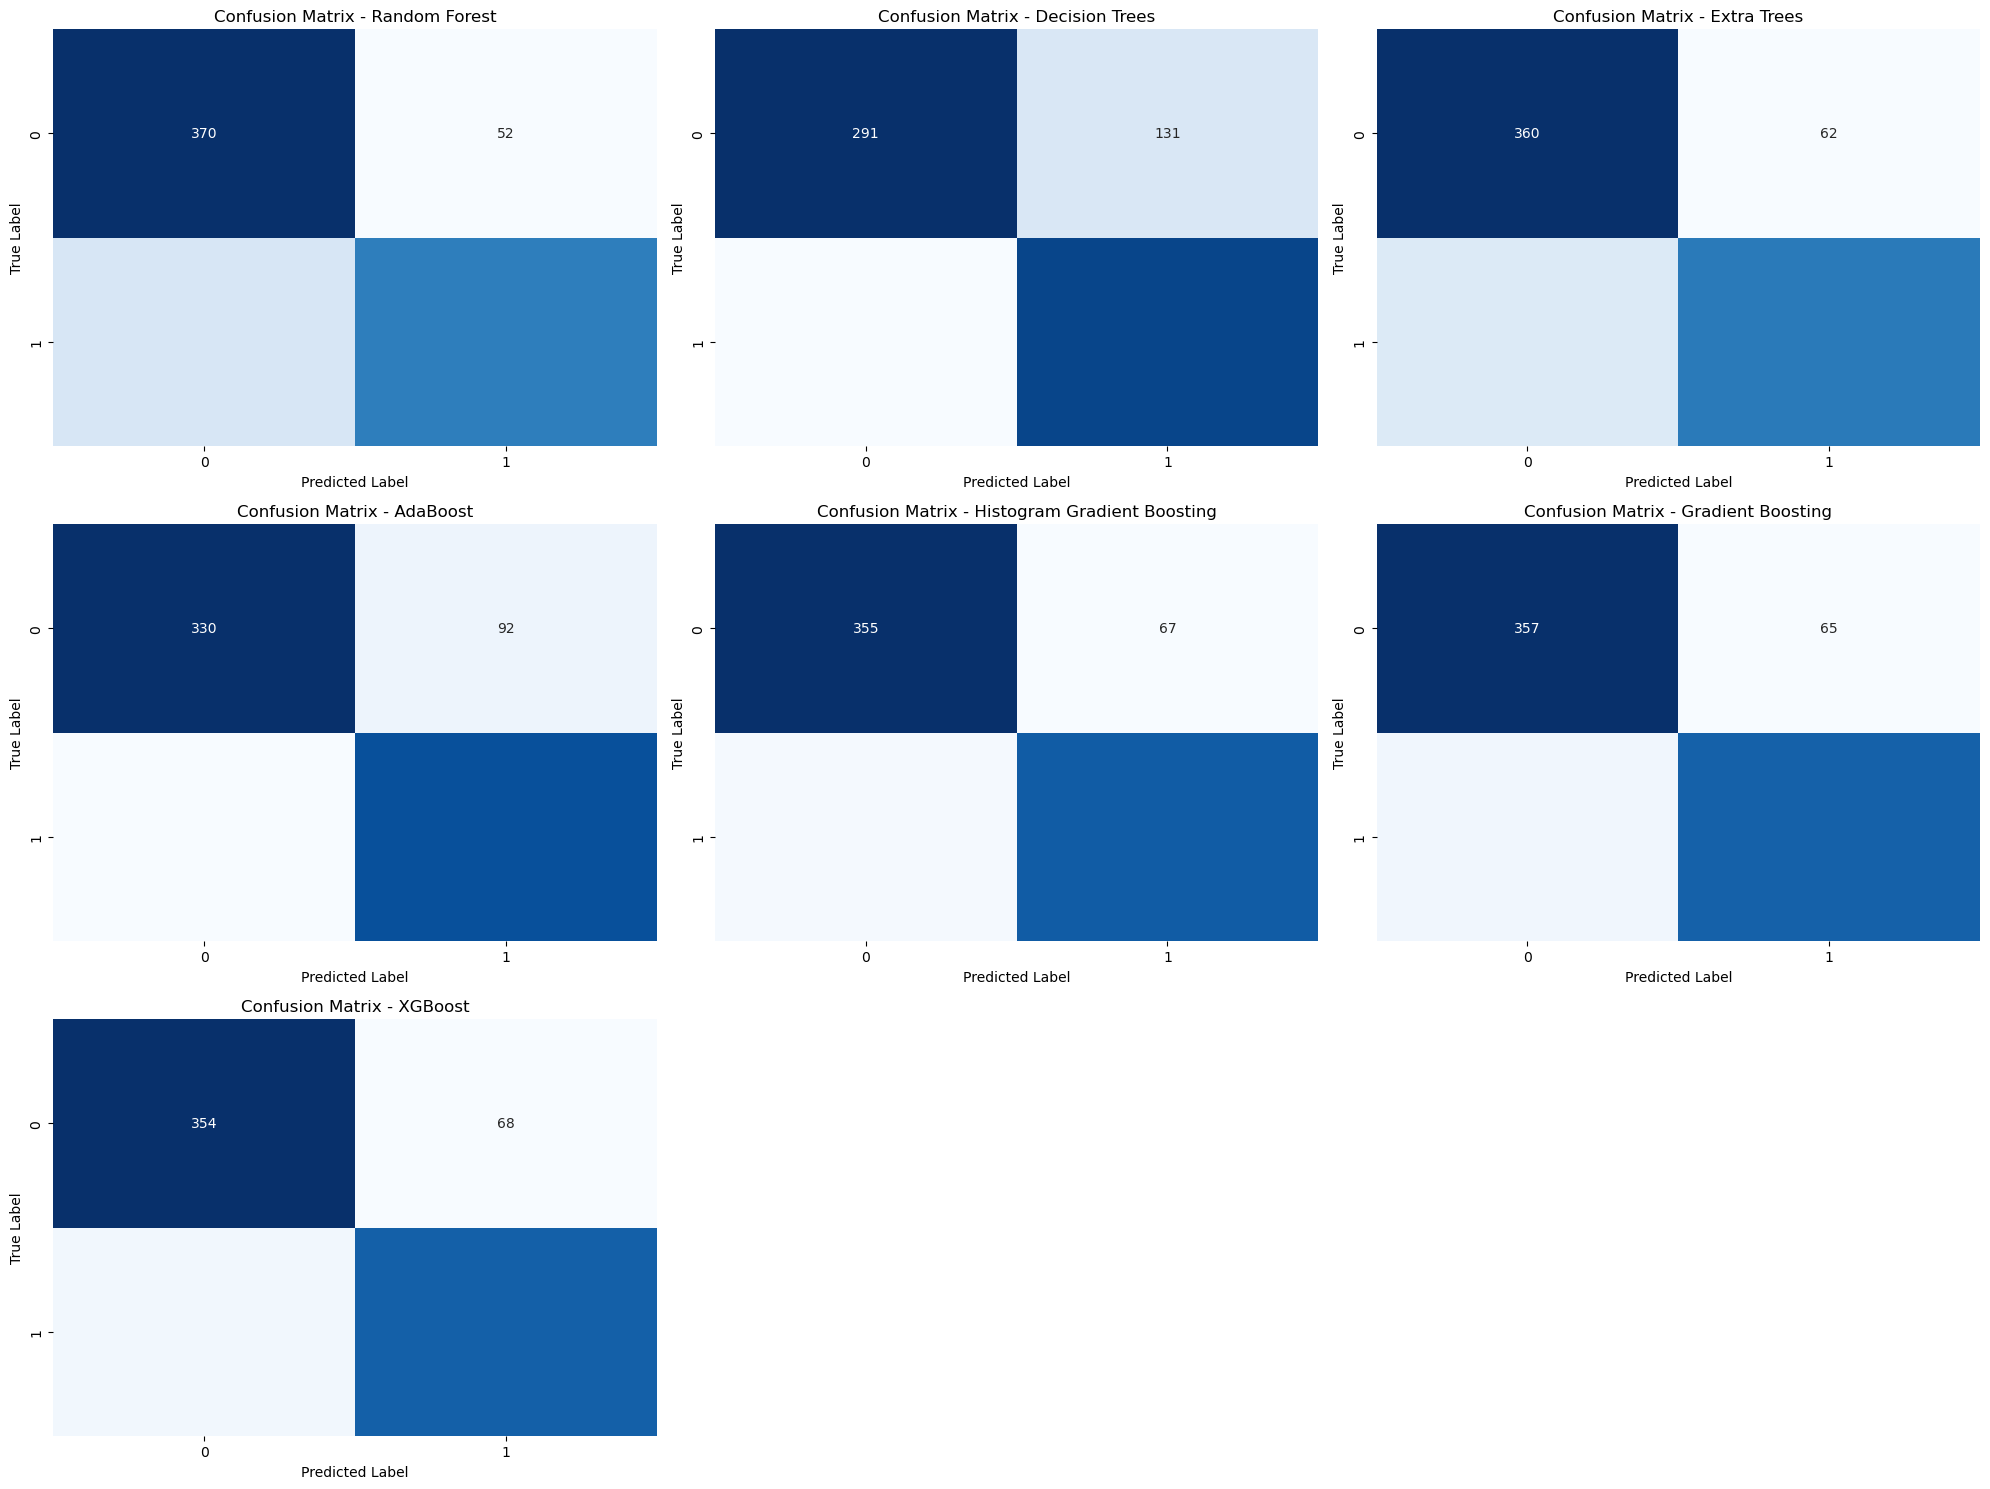

In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

algorithms = ['Random Forest', 'Decision Trees', 'Extra Trees', 'AdaBoost','Histogram Gradient Boosting', 'Gradient Boosting', 'XGBoost']

predictions = [y_pred_rf, y_pred_dt, y_pred_et, y_pred_ab, y_pred_hgb, y_pred_gb, y_pred_xgb]

plt.figure(figsize=(20, 15))

for i, pred in enumerate(predictions):
    cm = confusion_matrix(y_test, pred)
    ax = plt.subplot(3, 3,i + 1)
    sns.heatmap(cm.tolist(), annot=True, fmt='d',cmap='Blues', cbar=False, ax=ax)
    plt.title(f'Confusion Matrix - {algorithms[i]}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

plt.tight_layout()
plt.show()


# Classification Reports

In [26]:
classifiers = ['Random Forest', 'Decision Tree', 'Extra Trees', 'AdaBoost', 'HistGradientBoosting', 'Gradient Boosting', 'XGBoost']
y_preds = [y_pred_rf, y_pred_dt, y_pred_et, y_pred_ab, y_pred_hgb, y_pred_gb, y_pred_xgb]

for classifier, y_pred in zip(classifiers, y_preds):
    print(f"Classification Report for {classifier}:")
    print(classification_report(y_test, y_pred))
    print("="*50)


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       422
           1       0.84      0.73      0.78       378

    accuracy                           0.81       800
   macro avg       0.81      0.80      0.80       800
weighted avg       0.81      0.81      0.80       800

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.74      0.69      0.71       422
           1       0.68      0.73      0.70       378

    accuracy                           0.71       800
   macro avg       0.71      0.71      0.71       800
weighted avg       0.71      0.71      0.71       800

Classification Report for Extra Trees:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       422
           1       0.82      0.73      0.77       378

    accuracy                           0.80       800
   macr

# Probability prediction for all the algorithms

In [27]:
y_pred_proba_rf = rf_classifier.predict_proba(X_test)
y_pred_proba_dt = dt_classifier.predict_proba(X_test)
y_pred_proba_et = et_classifier.predict_proba(X_test)
y_pred_proba_ab = adaboost_classifier.predict_proba(X_test)
y_pred_proba_hgb = hist_gb_classifier.predict_proba(X_test)
y_pred_proba_gb = gb_classifier.predict_proba(X_test)

# ROC Curves

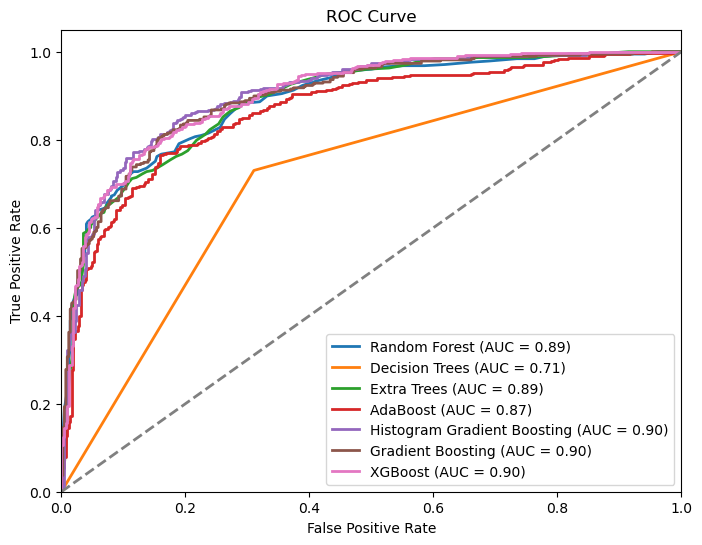

In [28]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_true, y_pred_probas, labels):
    plt.figure(figsize=(8, 6))
    for i in range(len(y_pred_probas)):
        if len(y_pred_probas[i].shape) == 1:  # Check if the array is single-dimensional
            fpr, tpr, _ = roc_curve(y_true, y_pred_probas[i])
        else:
            fpr, tpr, _ = roc_curve(y_true, y_pred_probas[i][:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label='%s (AUC = %0.2f)' % (labels[i], roc_auc))

    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

y_pred_probas = [y_pred_proba_rf, y_pred_proba_dt, y_pred_proba_et, y_pred_proba_ab, y_pred_proba_hgb, y_pred_proba_gb, y_pred_proba_xgb]
labels = ['Random Forest', 'Decision Trees', 'Extra Trees', 'AdaBoost', 'Histogram Gradient Boosting', 'Gradient Boosting', 'XGBoost']

plot_roc_curve(y_test, y_pred_probas, labels)

In [ ]:
from flask import Flask, render_template
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

app = Flask(__name__)

def calculate_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1score': f1}

algorithm_metrics = {
    'Random Forest': calculate_metrics(y_test, y_pred_rf),
    'Decision Trees': calculate_metrics(y_test, y_pred_dt),
    'Extra Trees': calculate_metrics(y_test, y_pred_et),
    'AdaBoost': calculate_metrics(y_test, y_pred_ab),
    'Histogram GB': calculate_metrics(y_test, y_pred_hgb),
    'Gradient Boosting': calculate_metrics(y_test, y_pred_gb),
    'XGBoost': calculate_metrics(y_test, y_pred_xgb)
}

@app.route('/')
def index():
    return render_template('index.html', algorithm_metrics=algorithm_metrics)

if __name__ == '__main__':
    app.run(debug=True, use_reloader=False)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [06/May/2024 11:44:59] "GET / HTTP/1.1" 200 -
